In [6]:
# Step 1: Import Required Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats

# Step 2: Define File Paths
# Update these paths to match the exact location of your CSV files
filename1 = "C:/Users/Ramesh/Documents/Foundation Of Data Science/dataset1.csv"
filename2 = "C:/Users/Ramesh/Documents/Foundation Of Data Science/dataset2.csv"

# Step 3: Load the Datasets
try:
    df1 = pd.read_csv(filename1)
    df2 = pd.read_csv(filename2)
    
    # Display the first few rows to verify loading
    print("Dataset 1 Head:")
    print(df1.head())
    print("\nDataset 2 Head:")
    print(df2.head())
    
    # Step 4: Check for Missing Values
    print("\nMissing Values in Dataset 1:")
    print(df1.isnull().sum())
    print("\nMissing Values in Dataset 2:")
    print(df2.isnull().sum())
    
except FileNotFoundError:
    print("Error: One or both CSV files were not found. Please check the file paths.")
    exit()
except Exception as e:
    print(f"An error occurred: {e}")
    exit()

# Step 5: Feature Engineering
df1['rat_present'] = np.where(
    (df1['seconds_after_rat_arrival'] > 0) & 
    (df1['start_time'] >= df1['rat_period_start']) & 
    (df1['start_time'] <= df1['rat_period_end']),
    1, 0
)
df1['vigilance_level'] = pd.cut(df1['bat_landing_to_food'].dropna(), bins=[0, 5, 15, np.inf], labels=['low', 'medium', 'high'])

# (Continue with subsequent steps as needed)

Dataset 1 Head:
         start_time  bat_landing_to_food habit  rat_period_start  \
0  30/12/2017 18:37            16.000000   rat  30/12/2017 18:35   
1  30/12/2017 19:51             0.074016  fast  30/12/2017 19:50   
2  30/12/2017 19:51             4.000000  fast  30/12/2017 19:50   
3  30/12/2017 19:52            10.000000   rat  30/12/2017 19:50   
4  30/12/2017 19:54            15.000000   rat  30/12/2017 19:50   

     rat_period_end  seconds_after_rat_arrival  risk  reward  month  \
0  30/12/2017 18:38                        108     1       0      0   
1  30/12/2017 19:55                         17     0       1      0   
2  30/12/2017 19:55                         41     0       1      0   
3  30/12/2017 19:55                        111     1       0      0   
4  30/12/2017 19:55                        194     1       0      0   

        sunset_time  hours_after_sunset  season  
0  30/12/2017 16:45            1.870833       0  
1  30/12/2017 16:45            3.100833       0 

In [18]:
# Step 4: Data Cleaning and Preparation
# Check for missing values
print("\nMissing Values in Dataset 1:")
print(df1.isnull().sum())
print("\nMissing Values in Dataset 2:")
print(df2.isnull().sum())


Missing Values in Dataset 1:
start_time                    0
bat_landing_to_food           0
habit                        41
rat_period_start              0
rat_period_end                0
seconds_after_rat_arrival     0
risk                          0
reward                        0
month                         0
sunset_time                   0
hours_after_sunset            0
season                        0
dtype: int64

Missing Values in Dataset 2:
time                  0
month                 0
hours_after_sunset    0
bat_landing_number    0
food_availability     0
rat_minutes           0
rat_arrival_number    0
dtype: int64


In [19]:
# Drop rows with missing values in key columns
key_cols_df1 = ['bat_landing_to_food', 'seconds_after_rat_arrival', 'risk', 'reward']
key_cols_df2 = ['bat_landing_number', 'rat_arrival_number', 'food_availability']
df1 = df1.dropna(subset=key_cols_df1)
df2 = df2.dropna(subset=key_cols_df2)

In [20]:
# Handle duplicates
df1 = df1.drop_duplicates()
df2 = df2.drop_duplicates()

# Fix data types with dayfirst=True for date parsing
df1['start_time'] = pd.to_datetime(df1['start_time'], errors='coerce', dayfirst=True)
df1['rat_period_start'] = pd.to_datetime(df1['rat_period_start'], errors='coerce', dayfirst=True)
df1['rat_period_end'] = pd.to_datetime(df1['rat_period_end'], errors='coerce', dayfirst=True)
df1['sunset_time'] = pd.to_datetime(df1['sunset_time'], errors='coerce', dayfirst=True)
df2['time'] = pd.to_datetime(df2['time'], errors='coerce', dayfirst=True)

df1['bat_landing_to_food'] = pd.to_numeric(df1['bat_landing_to_food'], errors='coerce')
df1['seconds_after_rat_arrival'] = pd.to_numeric(df1['seconds_after_rat_arrival'], errors='coerce')
df1['hours_after_sunset'] = pd.to_numeric(df1['hours_after_sunset'], errors='coerce')
df1['risk'] = df1['risk'].astype(int)
df1['reward'] = df1['reward'].astype(int)

df2['hours_after_sunset'] = pd.to_numeric(df2['hours_after_sunset'], errors='coerce')
df2['bat_landing_number'] = pd.to_numeric(df2['bat_landing_number'], errors='coerce')
df2['food_availability'] = pd.to_numeric(df2['food_availability'], errors='coerce')
df2['rat_minutes'] = pd.to_numeric(df2['rat_minutes'], errors='coerce')
df2['rat_arrival_number'] = pd.to_numeric(df2['rat_arrival_number'], errors='coerce')


In [21]:
# Clip negative values to 0
df1['seconds_after_rat_arrival'] = df1['seconds_after_rat_arrival'].clip(lower=0)
df1['bat_landing_to_food'] = df1['bat_landing_to_food'].clip(lower=0)
df1['hours_after_sunset'] = df1['hours_after_sunset'].clip(lower=0)
df2['hours_after_sunset'] = df2['hours_after_sunset'].clip(lower=0)
df2['rat_minutes'] = df2['rat_minutes'].clip(lower=0)

In [22]:
# Outlier handling for bat_landing_to_food
Q1 = df1['bat_landing_to_food'].quantile(0.25)
Q3 = df1['bat_landing_to_food'].quantile(0.75)
IQR = Q3 - Q1
df1 = df1[(df1['bat_landing_to_food'] >= Q1 - 1.5 * IQR) & (df1['bat_landing_to_food'] <= Q3 + 1.5 * IQR)]

In [7]:
# Step 5: Feature Engineering
df1['rat_present'] = np.where(
    (df1['seconds_after_rat_arrival'] > 0) & 
    (df1['start_time'] >= df1['rat_period_start']) & 
    (df1['start_time'] <= df1['rat_period_end']),
    1, 0
)
df1['vigilance_level'] = pd.cut(df1['bat_landing_to_food'], bins=[0, 5, 15, np.inf], labels=['low', 'medium', 'high'])

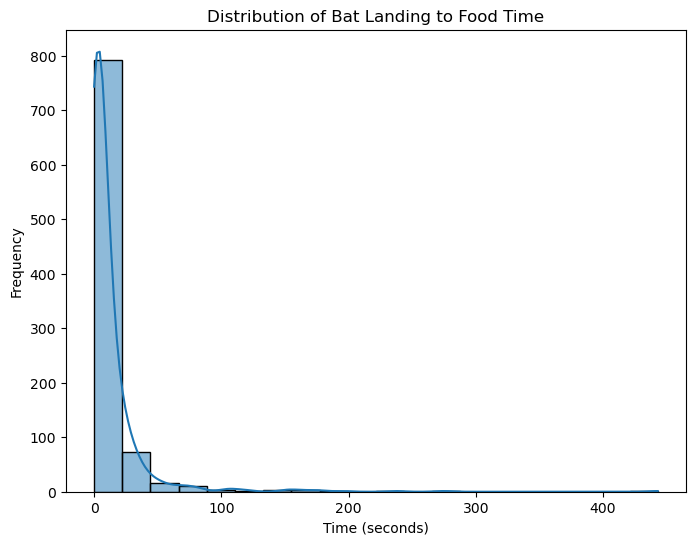


Correlation between bat landings and rat arrivals: -0.073536325460434

Average Bat Landings by Hours After Sunset:
hours_after_sunset
-2.0      9.270270
-1.5     11.531915
-1.0     13.315789
-0.5     19.084507
 0.0     19.041096
 0.5     21.592105
 1.0     25.623377
 1.5     33.666667
 2.0     38.493671
 2.5     42.860759
 3.0     46.746835
 3.5     47.278481
 4.0     55.423077
 4.5     55.037975
 5.0     56.262500
 5.5     57.350000
 6.0     53.375000
 6.5     51.037500
 7.0     48.692308
 7.5     41.025974
 8.0     32.413333
 8.5     29.040000
 9.0     21.626667
 9.5     17.960000
 10.0    14.267606
 10.5    11.060606
 11.0     8.250000
 11.5     5.937500
 12.0     5.575000
 12.5     4.133333
 13.0     2.838710
 13.5     3.294118
Name: bat_landing_number, dtype: float64


In [15]:
# Step 6: Exploratory Data Analysis (EDA)
# 6.1: Distribution plots (e.g., histogram of bat_landing_to_food in df1)
plt.figure(figsize=(8, 6))
sns.histplot(df1['bat_landing_to_food'], bins=20, kde=True)
plt.title('Distribution of Bat Landing to Food Time')
plt.xlabel('Time (seconds)')
plt.ylabel('Frequency')
plt.show()

# 6.2: Correlation in df2 (e.g., bat_landing_number vs rat_arrival_number)
correlation = df2['bat_landing_number'].corr(df2['rat_arrival_number'])
print(f"\nCorrelation between bat landings and rat arrivals: {correlation}")

# Trends: Group by hours_after_sunset for average bat landings
df2_grouped = df2.groupby('hours_after_sunset')['bat_landing_number'].mean()
print("\nAverage Bat Landings by Hours After Sunset:")
print(df2_grouped)

In [16]:
# Step 7: Inferential Analysis
# 7.1: t-test for bat_landing_to_food by rat_present (H0: no difference, H1: longer when rats present)
group_rat = df1[df1['rat_present'] == 1]['bat_landing_to_food']
group_no_rat = df1[df1['rat_present'] == 0]['bat_landing_to_food']
t_stat, p_value = stats.ttest_ind(group_rat, group_no_rat, alternative='greater', nan_policy='omit')
print(f"\nt-test for bat_landing_to_food (rats present vs absent): t-stat = {t_stat}, p-value = {p_value}")

# 7.2: Chi-square test for risk by rat_present
contingency_table = pd.crosstab(df1['risk'], df1['rat_present'])
chi2, p_chi, dof, expected = stats.chi2_contingency(contingency_table)
print(f"\nChi-square test for risk by rat_present: chi2 = {chi2}, p-value = {p_chi}")


t-test for bat_landing_to_food (rats present vs absent): t-stat = -0.21871393623558438, p-value = 0.58653889792865

Chi-square test for risk by rat_present: chi2 = 0.0, p-value = 1.0


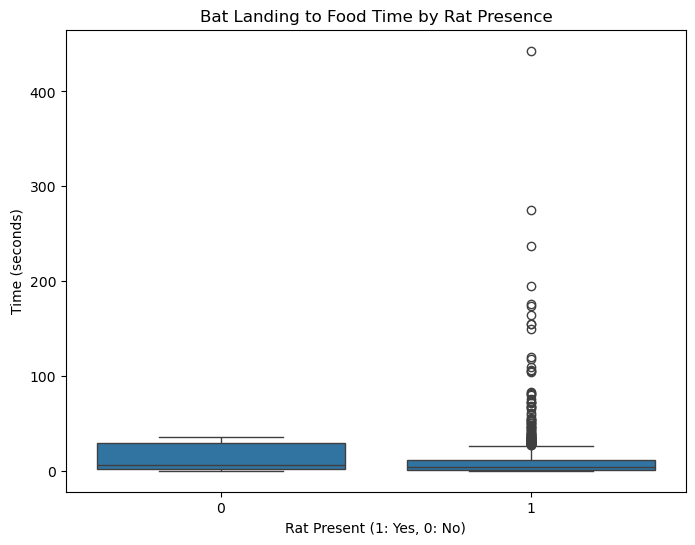

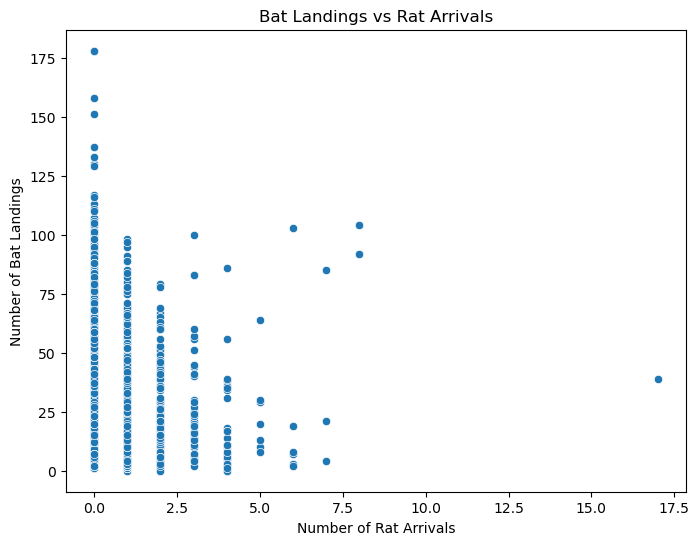

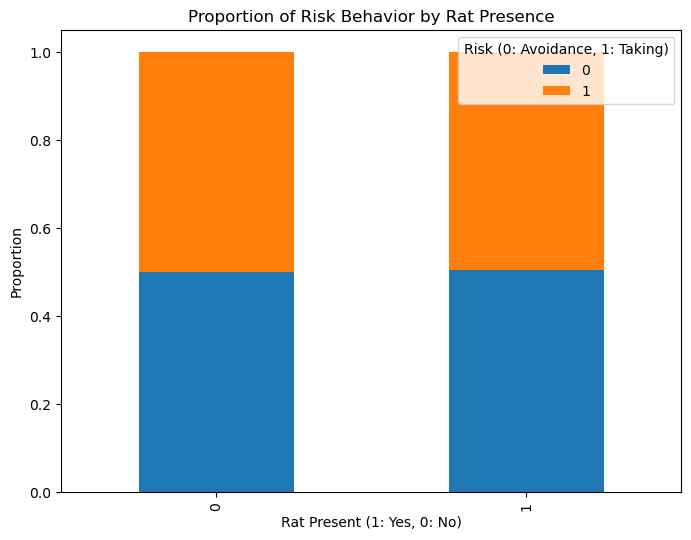

In [17]:
# Step 8: Visualizations
# 8.1: Boxplot of bat_landing_to_food by rat_present (df1)
plt.figure(figsize=(8, 6))
sns.boxplot(x='rat_present', y='bat_landing_to_food', data=df1)
plt.title('Bat Landing to Food Time by Rat Presence')
plt.xlabel('Rat Present (1: Yes, 0: No)')
plt.ylabel('Time (seconds)')
plt.show()

# 8.2: Scatter plot of bat_landing_number vs rat_arrival_number (df2)
plt.figure(figsize=(8, 6))
sns.scatterplot(x='rat_arrival_number', y='bat_landing_number', data=df2)
plt.title('Bat Landings vs Rat Arrivals')
plt.xlabel('Number of Rat Arrivals')
plt.ylabel('Number of Bat Landings')
plt.show()

# 8.3: Bar plot of risk proportions by rat_present (df1)
risk_proportions = df1.groupby('rat_present')['risk'].value_counts(normalize=True).unstack()
risk_proportions.plot(kind='bar', stacked=True, figsize=(8, 6))
plt.title('Proportion of Risk Behavior by Rat Presence')
plt.xlabel('Rat Present (1: Yes, 0: No)')
plt.ylabel('Proportion')
plt.legend(title='Risk (0: Avoidance, 1: Taking)')
plt.show()

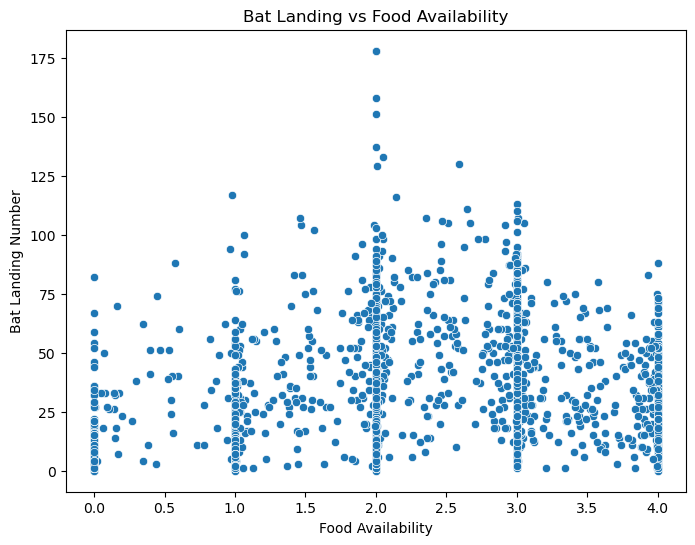

In [18]:
# Visualization 1: Bat Landing vs Food Availability
plt.figure(figsize=(8, 6))
sns.scatterplot(x='food_availability', y='bat_landing_number', data=df2)
plt.title('Bat Landing vs Food Availability')
plt.xlabel('Food Availability')
plt.ylabel('Bat Landing Number')
plt.show()

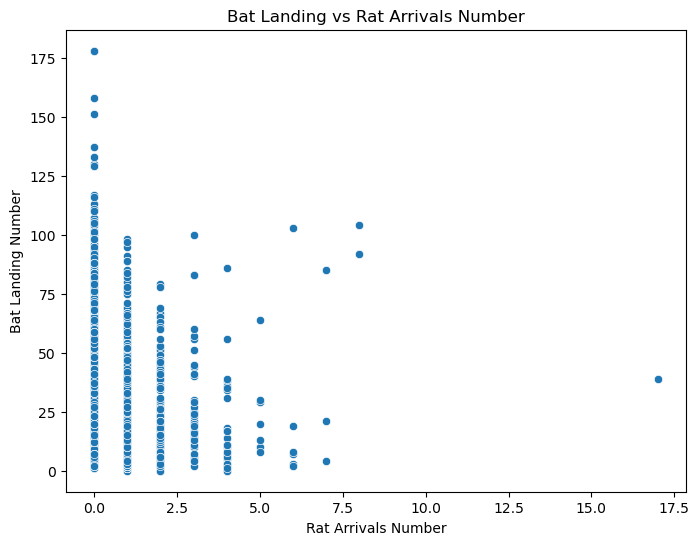

In [19]:
# Visualization 2: Bat Landing vs Rat Arrivals Number
plt.figure(figsize=(8, 6))
sns.scatterplot(x='rat_arrival_number', y='bat_landing_number', data=df2)
plt.title('Bat Landing vs Rat Arrivals Number')
plt.xlabel('Rat Arrivals Number')
plt.ylabel('Bat Landing Number')
plt.show()

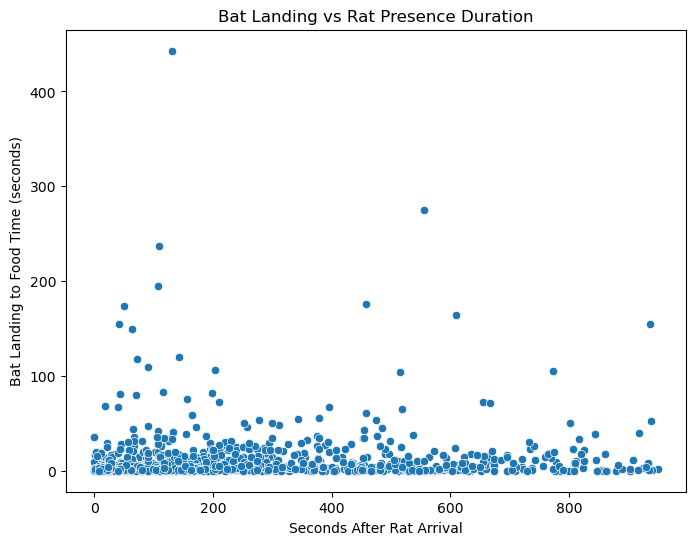

In [20]:
# Visualization 3: Bat Landing vs Rat Presence Duration
plt.figure(figsize=(8, 6))
sns.scatterplot(x='seconds_after_rat_arrival', y='bat_landing_to_food', data=df1)
plt.title('Bat Landing vs Rat Presence Duration')
plt.xlabel('Seconds After Rat Arrival')
plt.ylabel('Bat Landing to Food Time (seconds)')
plt.show()

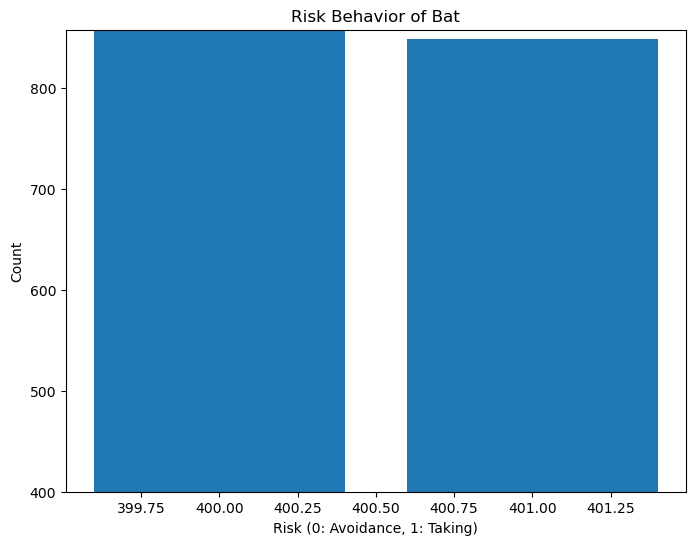

In [21]:
# Visualization 4: Risk Behavior of Bat (Bar chart starting from 400)
plt.figure(figsize=(8, 6))
risk_counts = df1['risk'].value_counts().sort_index()
plt.bar(risk_counts.index + 400, risk_counts.values, bottom=400)
plt.title('Risk Behavior of Bat')
plt.xlabel('Risk (0: Avoidance, 1: Taking)')
plt.ylabel('Count')
plt.ylim(400, max(risk_counts.values) + 400)
plt.show()


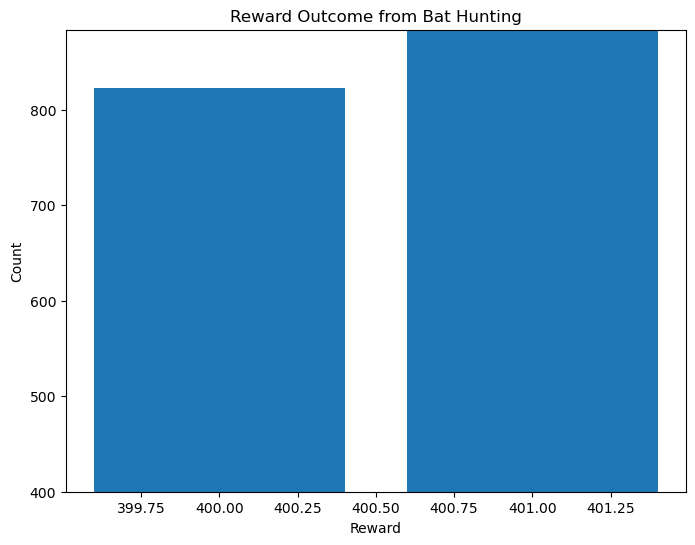

In [22]:
# Visualization 5: Reward Outcome from Bat Hunting (Bar chart starting from 400)
plt.figure(figsize=(8, 6))
reward_counts = df1['reward'].value_counts().sort_index()
plt.bar(reward_counts.index + 400, reward_counts.values, bottom=400)
plt.title('Reward Outcome from Bat Hunting')
plt.xlabel('Reward')
plt.ylabel('Count')
plt.ylim(400, max(reward_counts.values) + 400)
plt.show()

C:\Users\Ramesh\AppData\Local\Temp\ipykernel_9292\779857203.py:3: UserWarning: Parsing dates in %d/%m/%Y %H:%M format when dayfirst=False (the default) was specified. Pass `dayfirst=True` or specify a format to silence this warning.
  df1['month'] = pd.to_datetime(df1['start_time'], errors='coerce').dt.month


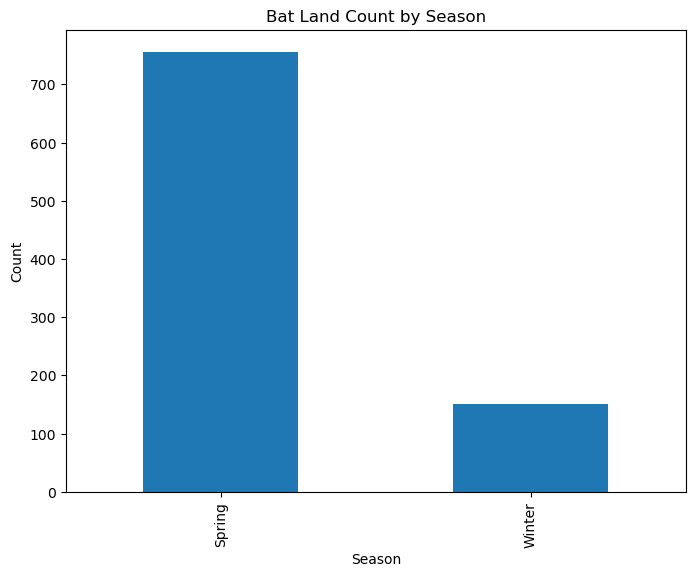

In [23]:
# Visualization 6: Bat Land Count by Season
# Assuming a 'season' column or deriving from date
df1['month'] = pd.to_datetime(df1['start_time'], errors='coerce').dt.month
season_map = {1: 'Winter', 2: 'Winter', 3: 'Spring', 4: 'Spring', 5: 'Spring', 6: 'Summer',
              7: 'Summer', 8: 'Summer', 9: 'Fall', 10: 'Fall', 11: 'Fall', 12: 'Winter'}
df1['season'] = df1['month'].map(season_map)
bat_land_by_season = df1.groupby('season').size()
plt.figure(figsize=(8, 6))
bat_land_by_season.plot(kind='bar')
plt.title('Bat Land Count by Season')
plt.xlabel('Season')
plt.ylabel('Count')
plt.show()


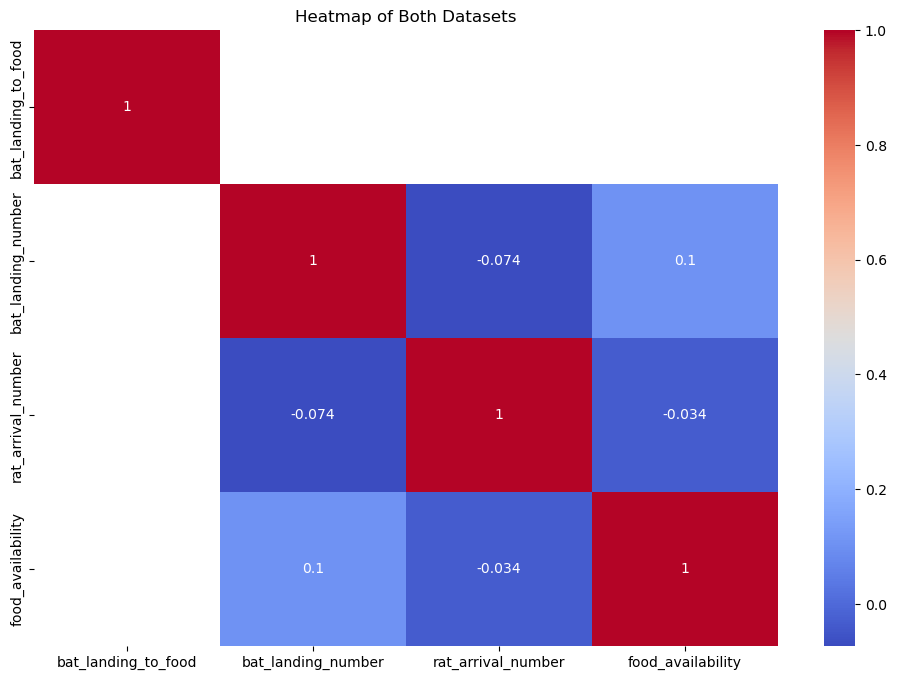

In [25]:
# Visualization 8: Heatmap of Both Datasets
combined_df = pd.merge(df1, df2, on='hours_after_sunset', how='outer')
plt.figure(figsize=(12, 8))
sns.heatmap(combined_df[['bat_landing_to_food', 'bat_landing_number', 'rat_arrival_number', 'food_availability']].corr(), annot=True, cmap='coolwarm')
plt.title('Heatmap of Both Datasets')
plt.show()

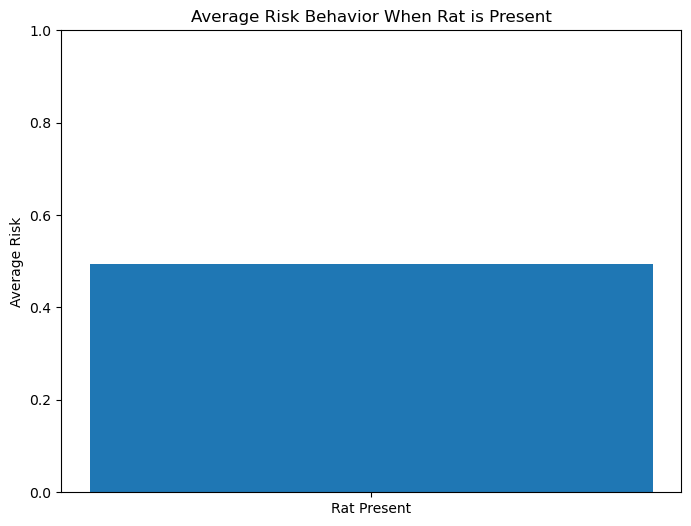

In [26]:
# Visualization 9: Average Risk Behavior When Rat is Present
avg_risk_rat_present = df1[df1['rat_present'] == 1]['risk'].mean()
plt.figure(figsize=(8, 6))
plt.bar(['Rat Present'], [avg_risk_rat_present])
plt.title('Average Risk Behavior When Rat is Present')
plt.ylabel('Average Risk')
plt.ylim(0, 1)
plt.show()

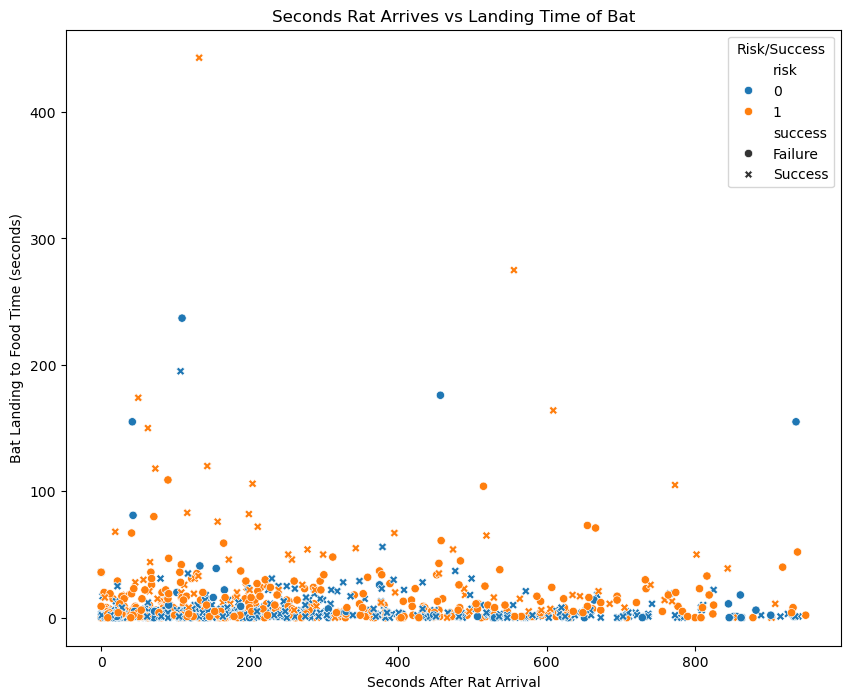

In [27]:
# Visualization 10: Scatterplot - Seconds Rat Arrives vs Landing Time, Colored by Risk, Symbol by Success
df1['success'] = np.where(df1['reward'] > 0, 'Success', 'Failure')
plt.figure(figsize=(10, 8))
sns.scatterplot(x='seconds_after_rat_arrival', y='bat_landing_to_food', hue='risk', style='success', data=df1)
plt.title('Seconds Rat Arrives vs Landing Time of Bat')
plt.xlabel('Seconds After Rat Arrival')
plt.ylabel('Bat Landing to Food Time (seconds)')
plt.legend(title='Risk/Success')
plt.show()